In [1]:
import nltk
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.cluster.hierarchy import linkage, leaves_list
import json

# Analysing the given hierarchy tree $\mathcal{T}$

In [2]:
def tree_to_graph(tree):
    """Converts an NLTK tree into a NetworkX graph."""
    graph = nx.DiGraph()  # Create a directed graph
    
    def add_edges(tree, parent=None):
        """Recursively add edges to the graph from the tree."""
        if isinstance(tree, nltk.Tree):
            node_label = tree.label()  # Assign a label to each node
            node_label = ''.join(e for e in node_label if e.isalnum())

            # Add an edge from the parent to the current node (if parent exists)
            if parent is not None:
                graph.add_edge(parent, node_label)

            # Recur for each child node
            for child in tree:
                add_edges(child, node_label)
        else:
            # For leaf nodes, directly connect with the parent
            tree = ''.join(e for e in tree if e.isalnum())
            graph.add_edge(parent, tree)

    add_edges(tree)
    
    return graph

### FGVC-Aircraft

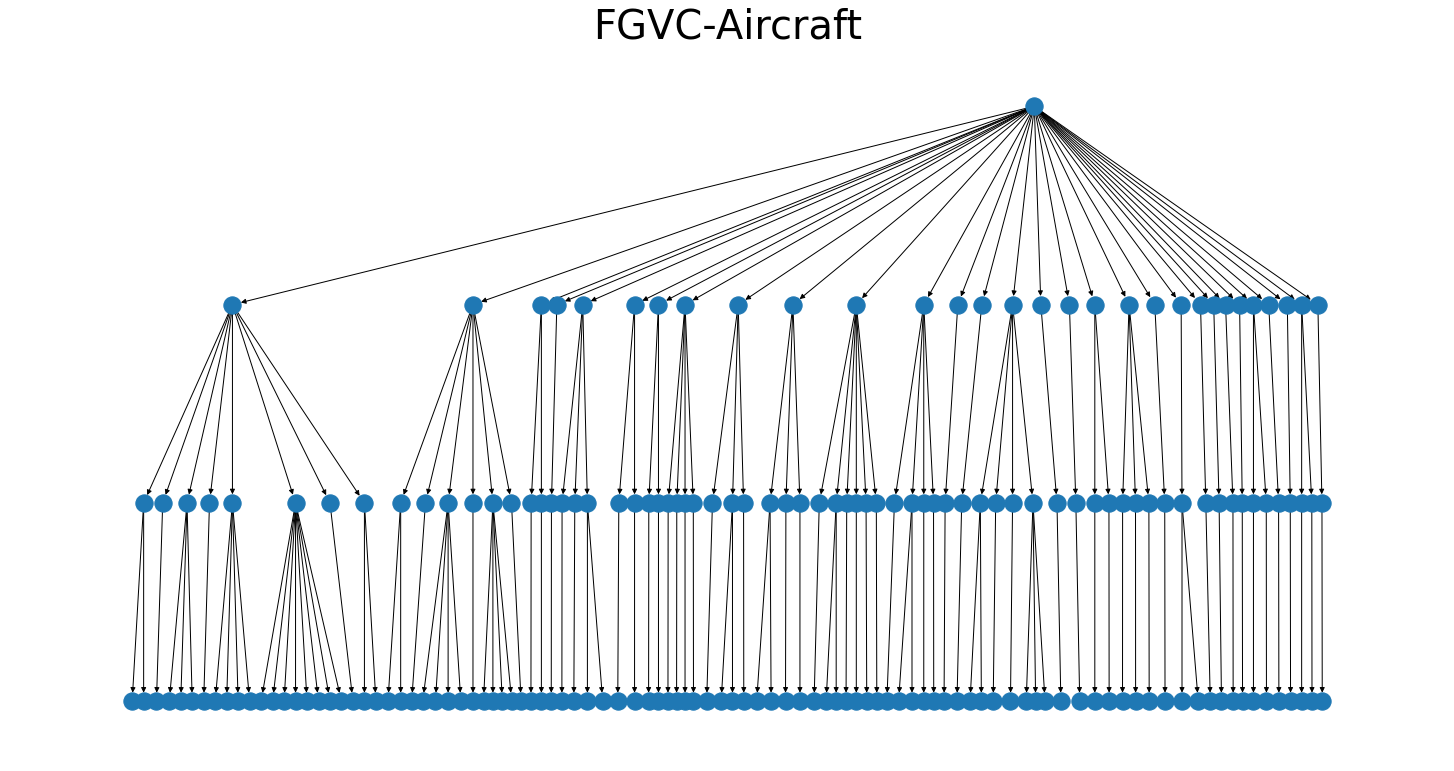

In [3]:
import pickle
with open(r'data/fgvc_aircraft_tree.pkl', 'rb') as fp:
    tree = pickle.load(fp)


# Convert the NLTK tree into a NetworkX graph
graph = tree_to_graph(tree)

plt.figure(figsize=(20, 10))
pos = graphviz_layout(graph, prog="dot")  # prog can be one of: twopi, dot, circo
nx.draw(graph, pos, with_labels = False)
plt.title("FGVC-Aircraft", fontsize=40)
plt.show()

### CIFAR-100

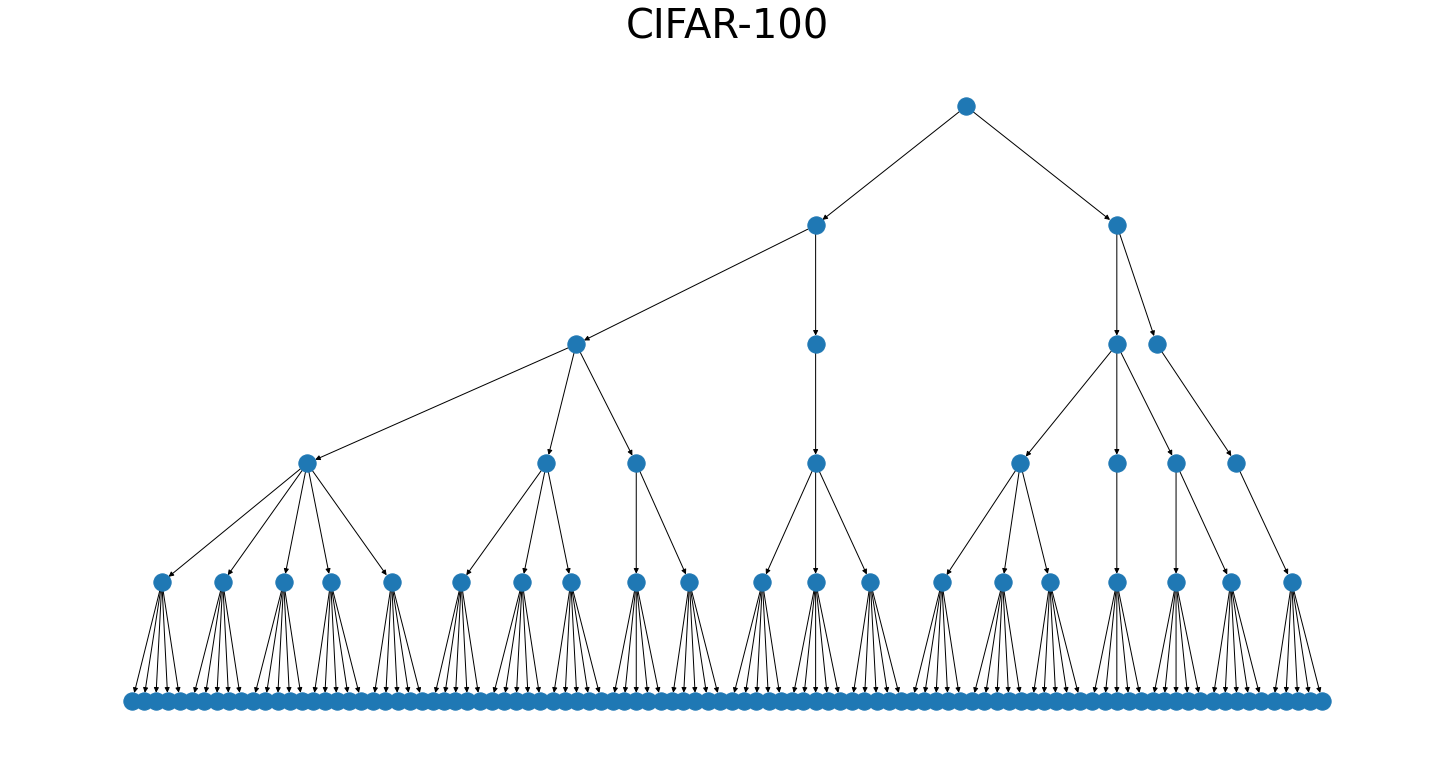

In [4]:
import pickle
with open(r'data/cifar-l5/original/cifar_100_tree.pkl', 'rb') as fp:
    tree = pickle.load(fp)
    

graph = tree_to_graph(tree)

plt.figure(figsize=(20, 10))
pos = graphviz_layout(graph, prog="dot")
nx.draw(graph, pos, with_labels = False)
plt.title("CIFAR-100", fontsize=40)
plt.show()

### iNaturalist-19

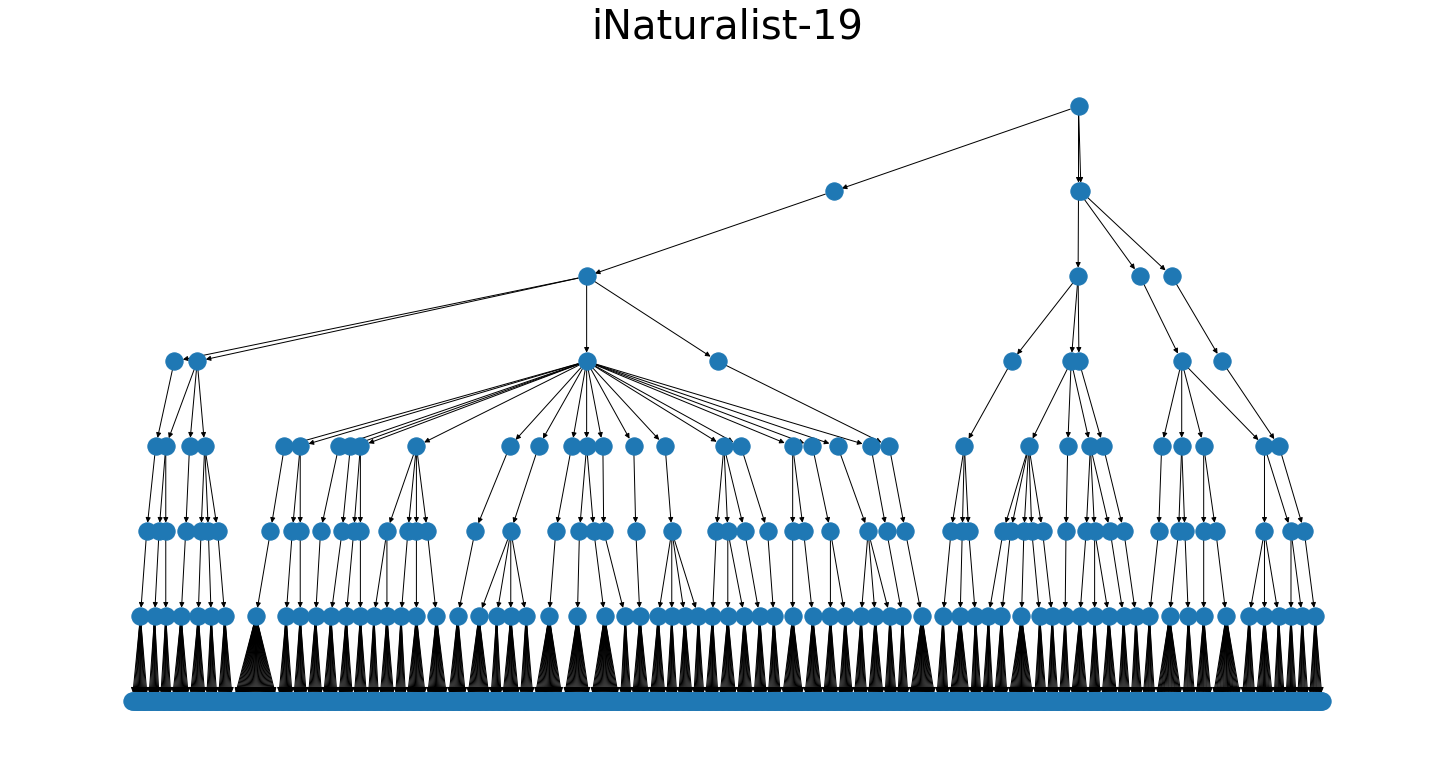

In [5]:
import pickle
with open(r'data/inaturalist19_tree.pkl', 'rb') as fp:
    tree = pickle.load(fp)
    

graph = tree_to_graph(tree)

plt.figure(figsize=(20, 10))
pos = graphviz_layout(graph, prog="dot")
nx.draw(graph, pos, with_labels = False)
plt.title("iNaturalist-19", fontsize=40)
plt.show()

### tieredImageNet-H

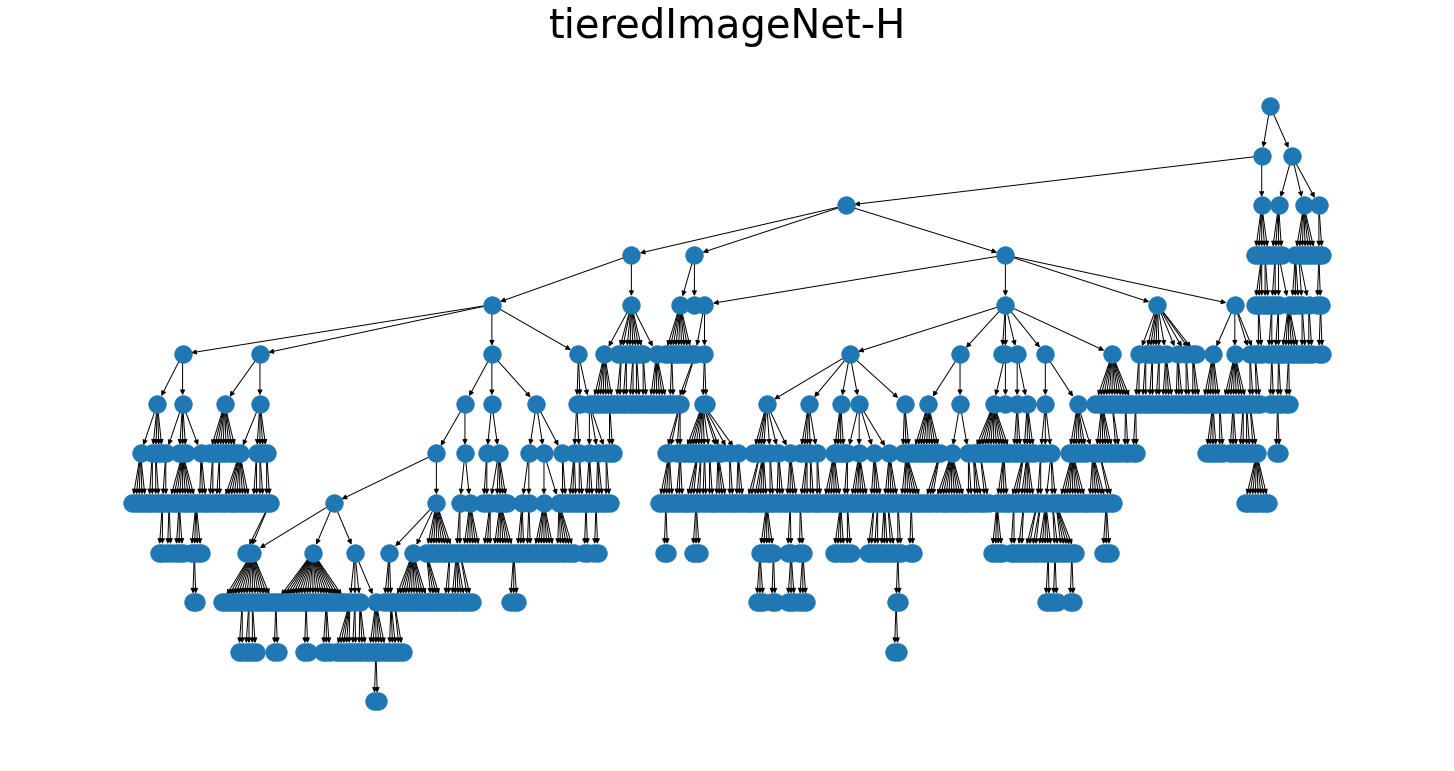

In [6]:
import pickle
with open(r'data/tiered_imagenet_tree.pkl', 'rb') as fp:
    tree = pickle.load(fp)
    

graph = tree_to_graph(tree)

plt.figure(figsize=(20, 10))
pos = graphviz_layout(graph, prog="dot")
nx.draw(graph, pos, with_labels = False)
plt.title("tieredImageNet-H", fontsize=40)
plt.show()

# Load prediction results for analysis

## Pick any one DATASET among ('fgvc', 'cifar-100', 'iNat', 'tiered-imagenet')

In [7]:
DATASET = "cifar-100"
SEEDS = [0, 1, 2, 3, 4]
methods = ["cross-entropy", "flamingo-t1", "flamingo", "hafeat-t1", "hafeat", "haframe", "hier-cos"]

if DATASET == "fgvc":
    ALPHA = 0.1
    GAMMA = 1.0
    max_level = 3
elif DATASET == "cifar-100":
    ALPHA = 0.05
    GAMMA = 1.0
    max_level = 5
elif DATASET == "iNat":
    ALPHA = 0.001
    GAMMA = 1.0
    max_level = 7
elif DATASET == "tiered-imagenet":
    ALPHA = '0.00001'
    GAMMA = 1.0
    max_level = 12
    
print("Computing metric for the following >>>")
print("Dataset:", DATASET)
print("Seed values:", SEEDS)
print("Algorithms:", methods)

Computing metric for the following >>>
Dataset: cifar-100
Seed values: [0, 1, 2, 3, 4]
Algorithms: ['cross-entropy', 'flamingo-t1', 'flamingo', 'hafeat-t1', 'hafeat', 'haframe', 'hier-cos']


In [8]:
DATA_DIR = {
    "cifar-100": "out/cifar-100",
    "fgvc": "out/fgvc-aircraft",
    "iNat": "out/inaturalist19-224",
    "tiered-imagenet": "out/tiered-imagenet-224"
}

DATA_PARAMS = {
    "fgvc": {
        "cross-entropy": {
            "arch": "custom_resnet50",
            "directory": f"cross-entropy-custom_resnet50"
        },
        "flamingo-t1": {
            "arch": "wide_resnet",
            "directory": "flamingo-l3-custom_resnet50"
        }, 
        "flamingo": {
            "arch": "haframe_wide_resnet",
            "directory": "flamingo-l3-haframe_resnet50"
        }, 
        "hafeat-t1": {
            "arch": "wide_resnet",
            "directory": f"hafeat-l3-cejsd-wtconst-dissim-custom_resnet50"
        },
        "hafeat": {
            "arch": "haframe_resnet50",
            "directory": f"hafeat-l3-cejsd-wtconst-dissim-haframe_resnet50"
        },
        "haframe": {
            "alpha": "0.5",
            "gamma": "1.0",
            "arch": "haframe_resnet50",
            "directory": "0.5-mixed-ce-gscsl-1.0-haframe_resnet50"
        }, 
        "hier-cos": {
            "alpha": ALPHA,
            "gamma": GAMMA,
            "arch": "haframe_resnet50",
            "directory": f"alpha_{ALPHA}/gamma_{GAMMA}/{ALPHA}-cross-entropy-{GAMMA}-haframe_resnet50"
        },
    },
    "cifar-100": {
        "cross-entropy": {
            "arch": "wide_resnet",
            "directory": "cross-entropy-wide_resnet"
        }, 
        "flamingo-t1": {
            "arch": "wide_resnet",
            "directory": "flamingo-l5-wide_resnet"
        }, 
        "flamingo": {
            "arch": "haframe_wide_resnet",
            "directory": "flamingo-l5-haframe_wide_resnet"
        }, 
        "hafeat-t1": {
            "arch": "wide_resnet",
            "directory": f"hafeat-l5-cejsd-wtconst-dissim-wide_resnet"
        },
        "hafeat": {
            "arch": "haframe_wide_resnet",
            "directory": f"hafeat-l5-cejsd-wtconst-dissim-haframe_wide_resnet"
        },
        "haframe": {
            "alpha": "0.4",
            "gamma": "2.0",
            "arch": "haframe_wide_resnet",
            "directory": "0.4-mixed-ce-gscsl-2.0-haframe_wide_resnet"
        }, 
        "hier-cos": {
            "alpha": ALPHA,
            "gamma": GAMMA,
            "arch": "haframe_wide_resnet",
            "directory": f"alpha_{ALPHA}/gamma_{GAMMA}/{ALPHA}-cross-entropy-{GAMMA}-haframe_wide_resnet"
        }, 
    },
    "iNat": {
        "cross-entropy": {
            "arch": "custom_resnet50",
            "directory": f"cross-entropy-custom_resnet50"
        },
        "vit-cross-entropy": {
            "arch": "vit",
            "directory": f"cross-entropy-vit"
        },
        "flamingo-t1": {
            "arch": "wide_resnet",
            "directory": "flamingo-l7-custom_resnet50"
        }, 
        "flamingo": {
            "arch": "haframe_wide_resnet",
            "directory": "flamingo-l7-haframe_resnet50"
        }, 
        "hafeat-t1": {
            "arch": "wide_resnet",
            "directory": f"hafeat-l7-cejsd-wtconst-dissim-custom_resnet50"
        },
        "hafeat": {
            "arch": "haframe_resnet50",
            "directory": f"hafeat-l7-cejsd-wtconst-dissim-haframe_resnet50"
        },
        "haframe": {
            "alpha": "0.4",
            "gamma": "5.0",
            "arch": "haframe_resnet50",
            "directory": "0.4-mixed-ce-gscsl-5.0-haframe_resnet50"
        }, 
        "hier-cos": {
            "alpha": ALPHA,
            "gamma": GAMMA,
            "arch": "haframe_resnet50",
            "directory": f"alpha_{ALPHA}/gamma_{GAMMA}/{ALPHA}-cross-entropy-{GAMMA}-haframe_resnet50"
        },
        "vit-hier-cos": {
            "alpha": 0.0001,
            "gamma": GAMMA,
            "arch": "haframe_vit",
            "directory": f"alpha_{0.0001}/gamma_{GAMMA}/{0.0001}-cross-entropy-{GAMMA}-haframe_vit"
        }
    },
    "tiered-imagenet": {
        "cross-entropy": {
            "arch": "custom_resnet50",
            "directory": f"cross-entropy-custom_resnet50"
        },
        "flamingo-t1": {
            "arch": "custom_resnet50",
            "directory": "flamingo-l12-custom_resnet50"
        }, 
        "flamingo": {
            "arch": "haframe_resnet50",
            "directory": "flamingo-l12-haframe_resnet50"
        }, 
        "hafeat-t1": {
            "arch": "custom_resnet50",
            "directory": f"hafeat-l12-cejsd-wtconst-dissim-custom_resnet50"
        },
        "hafeat": {
            "arch": "haframe_resnet50",
            "directory": f"hafeat-l12-cejsd-wtconst-dissim-haframe_resnet50"
        },
        "haframe": {
            "alpha": "0.4",
            "gamma": "2.0",
            "arch": "haframe_resnet50",
            "directory": f"0.5-mixed-ce-gscsl-3.0-haframe_resnet50"
        }, 
        "hier-cos": {
            "alpha": ALPHA,
            "gamma": GAMMA,
            "arch": "haframe_resnet50",
            "directory": f"alpha_{ALPHA}/gamma_{GAMMA}/{ALPHA}-cross-entropy-{GAMMA}-haframe_resnet50"
        }
    }
}

BASE = {seed: {} for seed in SEEDS}
PATH = {seed: {} for seed in SEEDS}
for method in methods:
    print(method.upper())
    for seed in SEEDS:
        BASE[seed][method] = os.path.join(DATA_DIR[DATASET], method) if "t1" not in method else os.path.join(DATA_DIR[DATASET], method.split("-t1")[0])
        PATH[seed][method] = os.path.join(BASE[seed][method], f"{DATA_PARAMS[DATASET][method]['directory']}-seed_{seed}")
        with open(os.path.join(PATH[seed][method], 'test_summary.json'), 'r') as file:
            results = json.load(file)
            print(f"\t========== {seed} ==========")
            print(f"\tTop-1 Accuracy (%): \t {np.round(results['accuracy_top/01'][0], 2)} %")
            print(f"\tMistake Severity: \t {np.round(results['ilsvrc_dist_mistakes/avg01'][0], 2)}")
            print(f"\tTop-1 Avg-Hier Dist: \t {np.round(results['ilsvrc_dist_avg/01'][0], 2)}")
            print(f"\tTop-5 Avg-Hier Dist: \t {np.round(results['ilsvrc_dist_avg/05'][0], 2)}")
            print(f"\tTop-20 Avg-Hier Dist: \t {np.round(results['ilsvrc_dist_avg/20'][0], 2)}")

CROSS-ENTROPY
	========== 0 ==========
	Top-1 Accuracy (%): 	 77.39 %
	Mistake Severity: 	 2.34
	Top-1 Avg-Hier Dist: 	 0.53
	Top-5 Avg-Hier Dist: 	 2.26
	Top-20 Avg-Hier Dist: 	 3.18
	========== 1 ==========
	Top-1 Accuracy (%): 	 77.74 %
	Mistake Severity: 	 2.33
	Top-1 Avg-Hier Dist: 	 0.52
	Top-5 Avg-Hier Dist: 	 2.24
	Top-20 Avg-Hier Dist: 	 3.18
	========== 2 ==========
	Top-1 Accuracy (%): 	 77.85 %
	Mistake Severity: 	 2.32
	Top-1 Avg-Hier Dist: 	 0.51
	Top-5 Avg-Hier Dist: 	 2.24
	Top-20 Avg-Hier Dist: 	 3.18
	========== 3 ==========
	Top-1 Accuracy (%): 	 77.87 %
	Mistake Severity: 	 2.33
	Top-1 Avg-Hier Dist: 	 0.51
	Top-5 Avg-Hier Dist: 	 2.25
	Top-20 Avg-Hier Dist: 	 3.19
	========== 4 ==========
	Top-1 Accuracy (%): 	 77.96 %
	Mistake Severity: 	 2.35
	Top-1 Avg-Hier Dist: 	 0.52
	Top-5 Avg-Hier Dist: 	 2.24
	Top-20 Avg-Hier Dist: 	 3.19
FLAMINGO-T1
	========== 0 ==========
	Top-1 Accuracy (%): 	 77.82 %
	Mistake Severity: 	 2.28
	Top-1 Avg-Hier Dist: 	 0.51
	Top-5 Avg-Hi

In [9]:
probabilities = {seed: {} for seed in SEEDS}
targets = {seed: {} for seed in SEEDS}
LCA_similarity = {seed: {} for seed in SEEDS}
projections = {level: {seed: {} for seed in SEEDS} for level in range(max_level)}
logits_ = {level: {seed: {} for seed in SEEDS} for level in range(max_level)}

for method in tqdm(methods):
    if 'hier-cos' in method or 'vit-hafs' in method:
        fname = 'haf++'
    else:
        fname = 'None'
    for seed in SEEDS:
        try:
            with open(os.path.join(PATH[seed]["hier-cos"], 'LCA_similarity.npy'), 'rb') as f:
                LCA_similarity[seed] = np.load(f)
        except:
            with open(os.path.join(PATH[seed]["vit-hier-cos"], 'LCA_similarity.npy'), 'rb') as f:
                LCA_similarity[seed] = np.load(f)
            
        with open(os.path.join(PATH[seed][method], f'test_dist_{fname}.npy'), 'rb') as f:
            probabilities[seed][method] = np.load(f)

        with open(os.path.join(PATH[seed][method], f'test_targets_{fname}.npy'), 'rb') as f:
            targets[seed][method] = np.load(f)

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.10it/s]


In [10]:
gt_class_wise_ranking = {seed: None for seed in SEEDS}
for seed in SEEDS:
    # expected ranking vectors for all the classes (based on tiered-imagenet hierarchy)
    gt_class_wise_ranking[seed] = np.zeros_like(LCA_similarity[seed])
    for _class in range(LCA_similarity[seed].shape[0]):
        unique_values, inverse_indices = np.unique(LCA_similarity[seed][_class], return_inverse=True)
        n_unique = len(unique_values)

        # Assign rank based on uniqueness (sort in descending order)
        gt_class_wise_ranking[seed][_class] = n_unique - inverse_indices - 1

# Analyse the errors in prediction orders for top-$k$ predictions

In [11]:
n_samples, n_classes = 0, 0

# Validate whether all the seeds and methods have same number of samples and classes
for seed in SEEDS:
    print(f"Seed-{seed}")
    for method in methods:
        n_samples = probabilities[seed][method].shape[0]
        n_classes = gt_class_wise_ranking[seed].shape[1]
        print(f"\t{method}", "#samples:", n_samples, "#classes:", n_classes)

Seed-0
	cross-entropy #samples: 9984 #classes: 100
	flamingo-t1 #samples: 9984 #classes: 100
	flamingo #samples: 9984 #classes: 100
	hafeat-t1 #samples: 9984 #classes: 100
	hafeat #samples: 9984 #classes: 100
	haframe #samples: 9984 #classes: 100
	hier-cos #samples: 9984 #classes: 100
Seed-1
	cross-entropy #samples: 9984 #classes: 100
	flamingo-t1 #samples: 9984 #classes: 100
	flamingo #samples: 9984 #classes: 100
	hafeat-t1 #samples: 9984 #classes: 100
	hafeat #samples: 9984 #classes: 100
	haframe #samples: 9984 #classes: 100
	hier-cos #samples: 9984 #classes: 100
Seed-2
	cross-entropy #samples: 9984 #classes: 100
	flamingo-t1 #samples: 9984 #classes: 100
	flamingo #samples: 9984 #classes: 100
	hafeat-t1 #samples: 9984 #classes: 100
	hafeat #samples: 9984 #classes: 100
	haframe #samples: 9984 #classes: 100
	hier-cos #samples: 9984 #classes: 100
Seed-3
	cross-entropy #samples: 9984 #classes: 100
	flamingo-t1 #samples: 9984 #classes: 100
	flamingo #samples: 9984 #classes: 100
	hafeat-t1

In [12]:
n_levels = gt_class_wise_ranking[seed].max()
n_classes = gt_class_wise_ranking[seed].shape[0]
top_k = [1, 3, 5, 10, 20, 50, None]
batch_size = 10000

pred_orders = {method: {k: None for k in top_k} for method in methods}
corr_orders = {method: {k: None for k in top_k} for method in methods}
corr_pred_orders = {method: {k: None for k in top_k} for method in methods}

for seed in SEEDS[:1]:
    for method in methods:
        all_logits = probabilities[seed][method]
        all_labels = targets[seed][method].reshape(-1, 1)
        
        for i in range(0, all_logits.shape[0], batch_size):
            logits = all_logits[i: i+batch_size]
            labels = all_labels[i: i+batch_size]
            expected_ranks = np.sort(gt_class_wise_ranking[seed][labels]).squeeze()
            obtained_ranks = gt_class_wise_ranking[seed][labels, np.argsort(logits, axis=1)[:, ::-1]]
            for k in top_k:
                wrong_order = np.abs(obtained_ranks[:, :k] - expected_ranks[:, :k]).sum(1) > 0
                if pred_orders[method][k] is None:
                    pred_orders[method][k] = obtained_ranks[:, :k][wrong_order]
                    corr_orders[method][k] = expected_ranks[:, :k][wrong_order]
                    corr_pred_orders[method][k] = obtained_ranks[:, :k][~wrong_order]
                else:
                    pred_orders[method][k] = np.vstack([pred_orders[method][k], obtained_ranks[:, :k][wrong_order]])
                    corr_orders[method][k] = np.vstack([corr_orders[method][k], expected_ranks[:, :k][wrong_order]])
                    corr_pred_orders[method][k] = np.vstack([corr_pred_orders[method][k], obtained_ranks[:, :k][~wrong_order]])

In [13]:
print(f"Dataset: {DATASET}\t|\t#total samples: {n_samples}")
num_incorrect_samples = {
    method: n_samples - (pred_orders[method][k][:, 0]>0).sum() for method in methods
}
plot_values = {method: [] for method in methods}
print("Percentage of samples that have correct top-k prediction order")
    
for k in top_k:
    print(f"Top-{k}" if k is not None else "All")
    for method in methods:
        print(f"\t{method.upper()}: \t{np.round(100*(n_samples - pred_orders[method][k].shape[0])/n_samples, 2)}%")
        plot_values[method].append(100*(n_samples - pred_orders[method][k].shape[0])/n_samples)

Dataset: cifar-100	|	#total samples: 9984
Percentage of samples that have correct top-k prediction order
Top-1
	CROSS-ENTROPY: 	77.39%
	FLAMINGO-T1: 	77.82%
	FLAMINGO: 	75.24%
	HAFEAT-T1: 	77.75%
	HAFEAT: 	76.17%
	HAFRAME: 	77.42%
	HIER-COS: 	77.86%
Top-3
	CROSS-ENTROPY: 	10.55%
	FLAMINGO-T1: 	18.75%
	FLAMINGO: 	10.72%
	HAFEAT-T1: 	46.2%
	HAFEAT: 	31.87%
	HAFRAME: 	71.48%
	HIER-COS: 	75.55%
Top-5
	CROSS-ENTROPY: 	0.55%
	FLAMINGO-T1: 	1.41%
	FLAMINGO: 	0.51%
	HAFEAT-T1: 	18.95%
	HAFEAT: 	4.85%
	HAFRAME: 	69.05%
	HIER-COS: 	75.29%
Top-10
	CROSS-ENTROPY: 	0.0%
	FLAMINGO-T1: 	0.04%
	FLAMINGO: 	0.0%
	HAFEAT-T1: 	1.05%
	HAFEAT: 	0.13%
	HAFRAME: 	66.22%
	HIER-COS: 	73.99%
Top-20
	CROSS-ENTROPY: 	0.0%
	FLAMINGO-T1: 	0.0%
	FLAMINGO: 	0.0%
	HAFEAT-T1: 	0.0%
	HAFEAT: 	0.0%
	HAFRAME: 	64.4%
	HIER-COS: 	73.59%
Top-50
	CROSS-ENTROPY: 	0.0%
	FLAMINGO-T1: 	0.0%
	FLAMINGO: 	0.0%
	HAFEAT-T1: 	0.0%
	HAFEAT: 	0.0%
	HAFRAME: 	58.57%
	HIER-COS: 	73.18%
All
	CROSS-ENTROPY: 	0.0%
	FLAMINGO-T1: 	0.0%
	FLAMINGO

[]

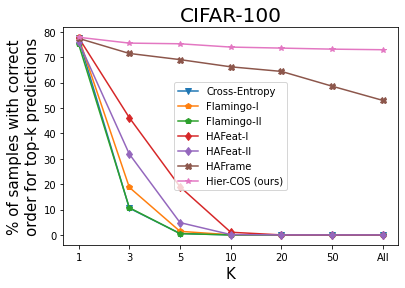

In [14]:
# In the paper, we did not include comparison with type-II models

markers = ['v', 'p', 'p', 'd', 'd', 'X', '*']
method_names = ['Cross-Entropy', 'Flamingo-I', 'Flamingo-II', 'HAFeat-I', 'HAFeat-II', 'HAFrame', 'Hier-COS (ours)']
for i, method in enumerate(methods):
    plt.plot(plot_values[method], label=method_names[i], marker=markers[i])
plt.xticks(range(7),  [1, 3, 5, 10, 20, 50, "All"])
plt.title(DATASET.upper(), size=20)
plt.xlabel("K", size=15)
plt.ylabel("% of samples with correct\norder for top-k predictions", size=15)
plt.legend()
plt.plot()

# Compute HOPS@$k$ and Analyse the Weight Distribution across top-$k$ classes

In [16]:
def generate_linear_decay(x, y, n):
    return np.linspace(x, y, n)

def generate_weights(A):
    B = []
    
    for row in A:
        unique_values = np.unique(row)  # Get unique values in non-increasing order
        B_row = np.zeros_like(row, dtype=float)
        
        # Iterate over each unique value in the row, except the last one
        for i, value in enumerate(unique_values):
            indices = np.where(row == value)[0]  # Indices of current unique value
            if i == 0:
                next_value = 0.0
            elif i < len(unique_values) - 1:
                next_value = unique_values[i - 1]  # Next minimum unique value
            else:
                next_value = 1.0  # For the smallest value, decay to 0

            # Generate decay values from current value to the next minimum value
            decay_values = generate_linear_decay(value, next_value, len(indices) + 1)[:-1]
            B_row[indices] = decay_values  # Assign decay values to the correct positions
            
        B.append(B_row)
    
    return np.array(B)

In [17]:
n_levels = gt_class_wise_ranking[seed].max()
n_classes = gt_class_wise_ranking[seed].shape[0]
HOPS = {seed: {} for seed in SEEDS}
batch_size = 10000

## HOPS

In [18]:
top_k = [None]

for seed in SEEDS:
    print(f"Seed-{seed}")
    for method in methods:
        all_logits = probabilities[seed][method]
        all_labels = targets[seed][method].reshape(-1, 1)
        score = {k: [] for k in top_k}
        HOPS[seed][method] = {k: [] for k in [None, 20, 5]}
        
        for i in range(0, all_logits.shape[0], batch_size):
            logits = all_logits[i: i+batch_size]
            labels = all_labels[i: i+batch_size]
            expected_ranks = np.sort(gt_class_wise_ranking[seed][labels]).squeeze()
            obtained_ranks = gt_class_wise_ranking[seed][labels, np.argsort(logits, axis=1)[:, ::-1]]
            for k in top_k:
                worst_rank = expected_ranks.copy()
                if k == 1:
                    metric = np.where(obtained_ranks[:, 0] == 0, 1, 0)
                    score[k].extend(metric)
                    continue
                if k is not None:
                    worst_rank[:, :k] = expected_ranks[:, :k][:,::-1]
                else:
                    worst_rank = expected_ranks[:, ::-1]
                exp = 1 / np.power(2, expected_ranks)
                classes = np.arange(1, n_classes + 1)
                worst_diff = np.abs(expected_ranks - worst_rank)
                diff = np.abs(expected_ranks - obtained_ranks)

                weights = generate_weights(exp)
                # Compute the worst metric
                worst_metric = np.sum(weights * worst_diff, axis=1)
                if k is not None:
                    weights[:, k:] = 0
                    # Compute the normalized weighted ranking difference
                metric = np.sum(weights * diff, axis=1) / worst_metric
                metric = np.clip(1 - metric, 0, 1)
                score[k].extend(metric)
        for k in top_k:
            HOPS[seed][method][k] = np.array(score[k])
            print(f"\t{method.upper()}: \t**{' @'+str(k) if k is not None else ''}", HOPS[seed][method][k].mean().round(4))

Seed-0
	CROSS-ENTROPY: 	** 0.544
	FLAMINGO-T1: 	** 0.5702
	FLAMINGO: 	** 0.512
	HAFEAT-T1: 	** 0.6945
	HAFEAT: 	** 0.6274
	HAFRAME: 	** 0.9206
	HIER-COS: 	** 0.9323
Seed-1
	CROSS-ENTROPY: 	** 0.5455
	FLAMINGO-T1: 	** 0.5751
	FLAMINGO: 	** 0.5193
	HAFEAT-T1: 	** 0.6928
	HAFEAT: 	** 0.6274
	HAFRAME: 	** 0.922
	HIER-COS: 	** 0.9314
Seed-2
	CROSS-ENTROPY: 	** 0.5445
	FLAMINGO-T1: 	** 0.5709
	FLAMINGO: 	** 0.512
	HAFEAT-T1: 	** 0.6927
	HAFEAT: 	** 0.6282
	HAFRAME: 	** 0.9226
	HIER-COS: 	** 0.9311
Seed-3
	CROSS-ENTROPY: 	** 0.5448
	FLAMINGO-T1: 	** 0.5702
	FLAMINGO: 	** 0.5151
	HAFEAT-T1: 	** 0.6924
	HAFEAT: 	** 0.6266
	HAFRAME: 	** 0.9198
	HIER-COS: 	** 0.9331
Seed-4
	CROSS-ENTROPY: 	** 0.5446
	FLAMINGO-T1: 	** 0.5718
	FLAMINGO: 	** 0.5162
	HAFEAT-T1: 	** 0.6946
	HAFEAT: 	** 0.6284
	HAFRAME: 	** 0.922
	HIER-COS: 	** 0.9299


### Select 10 random samples to visualize their corresponding multi-step exponential-linear weights
#### (the weights are computed using ground truth, therefore, selecting method has no consequence)

In [19]:
n_random_samples = 10
choices = np.random.choice(np.arange(weights.shape[0]), n_random_samples)

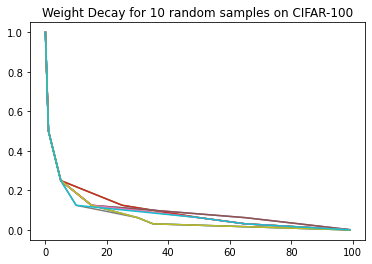

In [20]:
for i in choices:
    plt.plot(weights[i])
plt.title(f"Weight Decay for {n_random_samples} random samples on {DATASET.upper()}")
plt.show()

## HOPS@20

In [21]:
top_k = [20]

for seed in SEEDS:
    print(f"Seed-{seed}")
    for method in methods:
        all_logits = probabilities[seed][method]
        all_labels = targets[seed][method].reshape(-1, 1)
        score = {k: [] for k in top_k}
        
        for i in range(0, all_logits.shape[0], batch_size):
            logits = all_logits[i: i+batch_size]
            labels = all_labels[i: i+batch_size]
            expected_ranks = np.sort(gt_class_wise_ranking[seed][labels]).squeeze()
            obtained_ranks = gt_class_wise_ranking[seed][labels, np.argsort(logits, axis=1)[:, ::-1]]
            for k in top_k:
                worst_rank = expected_ranks.copy()
                if k == 1:
                    metric = np.where(obtained_ranks[:, 0] == 0, 1, 0)
                    score[k].extend(metric)
                    continue
                if k is not None:
                    worst_rank[:, :k] = expected_ranks[:, :k][:,::-1]
                else:
                    worst_rank = expected_ranks[:, ::-1]
                exp = 1 / np.power(2, expected_ranks)
                classes = np.arange(1, n_classes + 1)
                worst_diff = np.abs(expected_ranks - worst_rank)
                diff = np.abs(expected_ranks - obtained_ranks)

                weights = generate_weights(exp)
                # Compute the worst metric
                worst_metric = np.sum(weights * worst_diff, axis=1)
                if k is not None:
                    weights[:, k:] = 0
                    # Compute the normalized weighted ranking difference
                metric = np.sum(weights * diff, axis=1) / worst_metric
                metric = np.clip(1 - metric, 0, 1)
                score[k].extend(metric)
        for k in top_k:
            HOPS[seed][method][k] = np.array(score[k])
            print(f"\t{method.upper()}: \t**{' @'+str(k) if k is not None else ''}", HOPS[seed][method][k].mean().round(4))

Seed-0
	CROSS-ENTROPY: 	** @20 0.1705
	FLAMINGO-T1: 	** @20 0.2106
	FLAMINGO: 	** @20 0.1304
	HAFEAT-T1: 	** @20 0.4725
	HAFEAT: 	** @20 0.3229
	HAFRAME: 	** @20 0.8295
	HIER-COS: 	** @20 0.8538
Seed-1
	CROSS-ENTROPY: 	** @20 0.1714
	FLAMINGO-T1: 	** @20 0.2182
	FLAMINGO: 	** @20 0.1409
	HAFEAT-T1: 	** @20 0.4653
	HAFEAT: 	** @20 0.3242
	HAFRAME: 	** @20 0.8308
	HIER-COS: 	** @20 0.8521
Seed-2
	CROSS-ENTROPY: 	** @20 0.1707
	FLAMINGO-T1: 	** @20 0.2109
	FLAMINGO: 	** @20 0.1326
	HAFEAT-T1: 	** @20 0.4723
	HAFEAT: 	** @20 0.3232
	HAFRAME: 	** @20 0.8317
	HIER-COS: 	** @20 0.8517
Seed-3
	CROSS-ENTROPY: 	** @20 0.1705
	FLAMINGO-T1: 	** @20 0.2111
	FLAMINGO: 	** @20 0.136
	HAFEAT-T1: 	** @20 0.4659
	HAFEAT: 	** @20 0.3213
	HAFRAME: 	** @20 0.8278
	HIER-COS: 	** @20 0.8547
Seed-4
	CROSS-ENTROPY: 	** @20 0.1697
	FLAMINGO-T1: 	** @20 0.213
	FLAMINGO: 	** @20 0.1351
	HAFEAT-T1: 	** @20 0.4702
	HAFEAT: 	** @20 0.3241
	HAFRAME: 	** @20 0.8297
	HIER-COS: 	** @20 0.8501


### Use the previously selected 10 random samples to visualize their corresponding multi-step exponential-linear weights

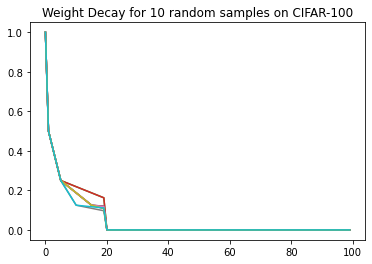

In [22]:
for i in choices:
    plt.plot(weights[i])
plt.title(f"Weight Decay for {n_random_samples} random samples on {DATASET.upper()}")
plt.show()

## HOPS@5

In [23]:
top_k = [5]

for seed in SEEDS:
    print(f"Seed-{seed}")
    for method in methods:
        all_logits = probabilities[seed][method]
        all_labels = targets[seed][method].reshape(-1, 1)
        score = {k: [] for k in top_k}
        
        for i in range(0, all_logits.shape[0], batch_size):
            logits = all_logits[i: i+batch_size]
            labels = all_labels[i: i+batch_size]
            expected_ranks = np.sort(gt_class_wise_ranking[seed][labels]).squeeze()
            obtained_ranks = gt_class_wise_ranking[seed][labels, np.argsort(logits, axis=1)[:, ::-1]]
            for k in top_k:
                worst_rank = expected_ranks.copy()
                if k == 1:
                    metric = np.where(obtained_ranks[:, 0] == 0, 1, 0)
                    score[k].extend(metric)
                    continue
                if k is not None:
                    worst_rank[:, :k] = expected_ranks[:, :k][:,::-1]
                else:
                    worst_rank = expected_ranks[:, ::-1]
                exp = 1 / np.power(2, expected_ranks)
                classes = np.arange(1, n_classes + 1)
                worst_diff = np.abs(expected_ranks - worst_rank)
                diff = np.abs(expected_ranks - obtained_ranks)

                weights = generate_weights(exp)
                # Compute the worst metric
                worst_metric = np.sum(weights * worst_diff, axis=1)
                if k is not None:
                    weights[:, k:] = 0
                    # Compute the normalized weighted ranking difference
                metric = np.sum(weights * diff, axis=1) / worst_metric
                metric = np.clip(1 - metric, 0, 1)
                score[k].extend(metric)
        for k in top_k:
            HOPS[seed][method][k] = np.array(score[k])
            print(f"\t{method.upper()}: \t**{' @'+str(k) if k is not None else ''}", HOPS[seed][method][k].mean().round(4))

Seed-0
	CROSS-ENTROPY: 	** @5 0.0486
	FLAMINGO-T1: 	** @5 0.0978
	FLAMINGO: 	** @5 0.0344
	HAFEAT-T1: 	** @5 0.4118
	HAFEAT: 	** @5 0.2226
	HAFRAME: 	** @5 0.7234
	HIER-COS: 	** @5 0.7635
Seed-1
	CROSS-ENTROPY: 	** @5 0.0514
	FLAMINGO-T1: 	** @5 0.0949
	FLAMINGO: 	** @5 0.036
	HAFEAT-T1: 	** @5 0.4036
	HAFEAT: 	** @5 0.2217
	HAFRAME: 	** @5 0.7256
	HIER-COS: 	** @5 0.7614
Seed-2
	CROSS-ENTROPY: 	** @5 0.0511
	FLAMINGO-T1: 	** @5 0.0901
	FLAMINGO: 	** @5 0.0349
	HAFEAT-T1: 	** @5 0.4135
	HAFEAT: 	** @5 0.224
	HAFRAME: 	** @5 0.7277
	HIER-COS: 	** @5 0.761
Seed-3
	CROSS-ENTROPY: 	** @5 0.0494
	FLAMINGO-T1: 	** @5 0.0881
	FLAMINGO: 	** @5 0.0328
	HAFEAT-T1: 	** @5 0.4033
	HAFEAT: 	** @5 0.2134
	HAFRAME: 	** @5 0.7216
	HIER-COS: 	** @5 0.7655
Seed-4
	CROSS-ENTROPY: 	** @5 0.0512
	FLAMINGO-T1: 	** @5 0.0948
	FLAMINGO: 	** @5 0.0345
	HAFEAT-T1: 	** @5 0.4186
	HAFEAT: 	** @5 0.2231
	HAFRAME: 	** @5 0.7248
	HIER-COS: 	** @5 0.7614


### Use the previously selected 10 random samples to visualize their corresponding multi-step exponential-linear weights

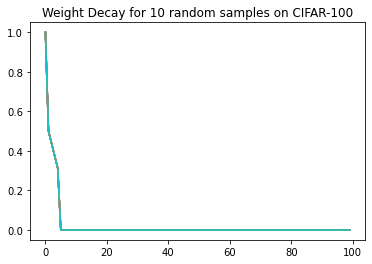

In [24]:
for i in choices:
    plt.plot(weights[i])
plt.title(f"Weight Decay for {n_random_samples} random samples on {DATASET.upper()}")
plt.show()

## Compute Mean and 95% Confidence Threshold for HOPS@$k$

In [25]:
from scipy import stats
alpha = 0.05
dof = len(SEEDS) - 1
t_value = stats.t.isf(alpha / 2, dof)
for k in [None, 20, 5]:
    print(f"HOPS@{k}")
    for method in methods:
        avg = np.mean([HOPS[seed][method][k].mean() for seed in SEEDS])
        conf95 = t_value * np.std([HOPS[seed][method][k].mean() for seed in SEEDS]) / np.sqrt(len(SEEDS))
        print(f"\t{method.upper()}: \t** \t%.2f" % (avg) + " +/- %.3f" % conf95)

HOPS@None
	CROSS-ENTROPY: 	** 	0.54 +/- 0.001
	FLAMINGO-T1: 	** 	0.57 +/- 0.002
	FLAMINGO: 	** 	0.51 +/- 0.003
	HAFEAT-T1: 	** 	0.69 +/- 0.001
	HAFEAT: 	** 	0.63 +/- 0.001
	HAFRAME: 	** 	0.92 +/- 0.001
	HIER-COS: 	** 	0.93 +/- 0.001
HOPS@20
	CROSS-ENTROPY: 	** 	0.17 +/- 0.001
	FLAMINGO-T1: 	** 	0.21 +/- 0.004
	FLAMINGO: 	** 	0.14 +/- 0.004
	HAFEAT-T1: 	** 	0.47 +/- 0.004
	HAFEAT: 	** 	0.32 +/- 0.001
	HAFRAME: 	** 	0.83 +/- 0.002
	HIER-COS: 	** 	0.85 +/- 0.002
HOPS@5
	CROSS-ENTROPY: 	** 	0.05 +/- 0.001
	FLAMINGO-T1: 	** 	0.09 +/- 0.004
	FLAMINGO: 	** 	0.03 +/- 0.001
	HAFEAT-T1: 	** 	0.41 +/- 0.007
	HAFEAT: 	** 	0.22 +/- 0.005
	HAFRAME: 	** 	0.72 +/- 0.003
	HIER-COS: 	** 	0.76 +/- 0.002


# Compute Full-Path Accuracy using HAFeat's approach for CIFAR-100

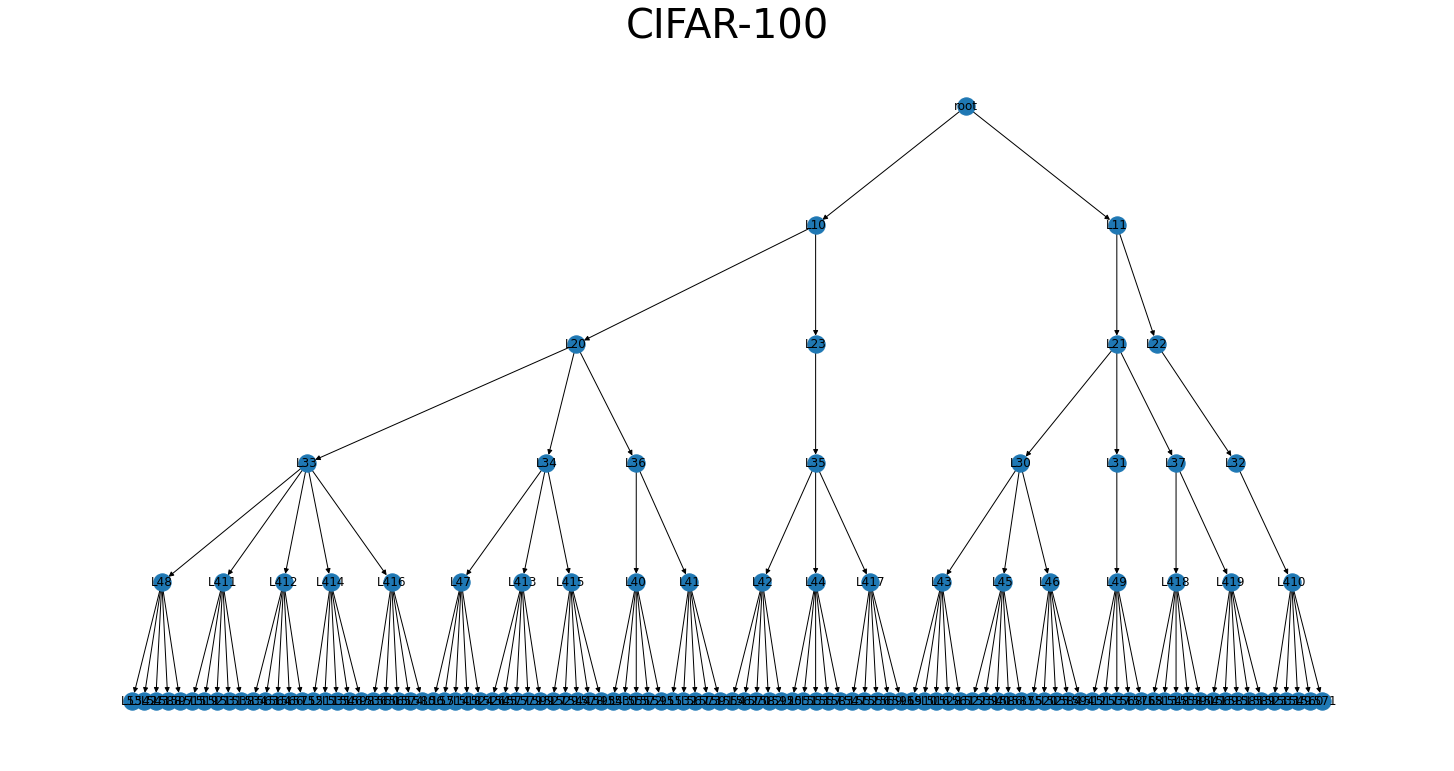

In [26]:
if DATASET != "cifar-100":
    print("Only supported for CIFAR-100")
else:
    bottom_up_hierarchy = np.array([
    [0, 4, 5, 3, 0],
    [1, 1, 6, 0, 0],
    [2, 14, 3, 0, 0],
    [3, 8, 3, 0, 0],
    [4, 0, 6, 0, 0],
    [5, 6, 0, 1, 1],    # 0
    [6, 7, 4, 0, 0],
    [7, 7, 4, 0, 0],
    [8, 18, 7, 1, 1],
    [9, 3, 0, 1, 1],    # 0
    [10, 3, 0, 1, 1],   # 0
    [11, 14, 3, 0, 0],
    [12, 9, 1, 1, 1],
    [13, 18, 7, 1, 1],
    [14, 7, 4, 0, 0],
    [15, 11, 3, 0, 0],
    [16, 3, 0, 1, 1],   # 0
    [17, 9, 1, 1, 1],
    [18, 7, 4, 0, 0],
    [19, 11, 3, 0, 0],
    [20, 6, 0, 1, 1],   # 0
    [21, 11, 3, 0, 0],
    [22, 5, 0, 1, 1],   # 0
    [23, 10, 2, 2, 1],
    [24, 7, 4, 0, 0],
    [25, 6, 0, 1, 1],   # 0
    [26, 13, 4, 0, 0],
    [27, 15, 4, 0, 0],
    [28, 3, 0, 1, 1],     # 0
    [29, 15, 4, 0, 0],
    [30, 0, 6, 0, 0],
    [31, 11, 3, 0, 0],
    [32, 1, 6, 0, 0],
    [33, 10, 2, 2, 1],
    [34, 12, 3, 0, 0],
    [35, 14, 3, 0, 0],
    [36, 16, 3, 0, 0],
    [37, 9, 1, 1, 1],
    [38, 11, 3, 0, 0],
    [39, 5, 0, 1, 1],     # 0
    [40, 5, 0, 1, 1],     # 0
    [41, 19, 7, 1, 1],
    [42, 8, 3, 0, 0],
    [43, 8, 3, 0, 0],
    [44, 15, 4, 0, 0],
    [45, 13, 4, 0, 0],
    [46, 14, 3, 0, 0],
    [47, 17, 5, 3, 0],
    [48, 18, 7, 1, 1],
    [49, 10, 2, 2, 1],
    [50, 16, 3, 0, 0],
    [51, 4, 5, 3, 0],
    [52, 17, 5, 3, 0],
    [53, 4, 5, 3, 0],
    [54, 2, 5, 3, 0],
    [55, 0, 6, 0, 0],
    [56, 17, 5, 3, 0],
    [57, 4, 5, 3, 0],
    [58, 18, 7, 1, 1],
    [59, 17, 5, 3, 0],
    [60, 10, 2, 2, 1],
    [61, 3, 0, 1, 1],     # 0
    [62, 2, 5, 3, 0],
    [63, 12, 3, 0, 0],
    [64, 12, 3, 0, 0],
    [65, 16, 3, 0, 0],
    [66, 12, 3, 0, 0],
    [67, 1, 6, 0, 0],
    [68, 9, 1, 1, 1],
    [69, 19, 7, 1, 1],
    [70, 2, 5, 3, 0],
    [71, 10, 2, 2, 1],
    [72, 0, 6, 0, 0],
    [73, 1, 6, 0, 0],
    [74, 16, 3, 0, 0],
    [75, 12, 3, 0, 0],
    [76, 9, 1, 1, 1],
    [77, 13, 4, 0, 0],
    [78, 15, 4, 0, 0],
    [79, 13, 4, 0, 0],
    [80, 16, 3, 0, 0],
    [81, 19, 7, 1, 1],
    [82, 2, 5, 3, 0],
    [83, 4, 5, 3, 0],
    [84, 6, 0, 1, 1],
    [85, 19, 7, 1, 1],
    [86, 5, 0, 1, 1],        # 0
    [87, 5, 0, 1, 1],         # 0
    [88, 8, 3, 0, 0],
    [89, 19, 7, 1, 1],
    [90, 18, 7, 1, 1],
    [91, 1, 6, 0, 0],
    [92, 2, 5, 3, 0],
    [93, 15, 4, 0, 0],
    [94, 6, 0, 1, 1],         # 0
    [95, 0, 6, 0, 0],
    [96, 17, 5, 3, 0],
    [97, 8, 3, 0, 0],
    [98, 14, 3, 0, 0],
    [99, 13, 4, 0, 0]])

In [27]:
for method in methods:
    all_fpa = []
    for seed in SEEDS:
        level_targets = bottom_up_hierarchy[targets[seed][method]]
        all_out = [probabilities[seed][method]]
        all_targets = [targets[seed][method]]
        for level in range(1, 5):
            classes = np.unique(bottom_up_hierarchy[:, level])
            level_pred = np.zeros((level_targets.shape[0], classes.shape[0]))
            for c in classes:
                level_pred[:, c] = probabilities[seed][method][:, np.argwhere(bottom_up_hierarchy[:, level] == c)].squeeze().sum(1)
            all_out.append(level_pred)
            all_targets.append(level_targets[:, level])


        fpa = None
        for i in range(1, 5):
            if fpa is None:
                fpa = (all_out[i-1].argmax(1) == all_targets[i-1]) & (all_out[i].argmax(1) == all_targets[i])
            else:
                fpa = (fpa & (all_out[i].argmax(1) == all_targets[i]))
        all_fpa.append((fpa.sum() / fpa.shape[0]))
    
    alpha = 0.05
    dof = len(SEEDS) - 1
    t_value = stats.t.isf(alpha / 2, dof)
    
    avg = np.mean(all_fpa)
    conf95 = t_value * np.std(all_fpa) / np.sqrt(len(SEEDS))
    print(f"{method.upper()}: \t **", np.round(100 * avg, 2), "+/-", np.round(conf95, 3))

CROSS-ENTROPY: 	 ** 77.11 +/- 0.002
FLAMINGO-T1: 	 ** 77.34 +/- 0.002
FLAMINGO: 	 ** 74.84 +/- 0.005
HAFEAT-T1: 	 ** 18.23 +/- 0.001
HAFEAT: 	 ** 17.97 +/- 0.001
HAFRAME: 	 ** 77.0 +/- 0.002
HIER-COS: 	 ** 77.35 +/- 0.001
